**Ce notebook est une copie de Prosper_clust_ML**

Les réglages des ngram et min max df sont différents

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import spacy

from featuring.functions import describedf, StringAnalyzer, WebSiteListAnalyser, MergeDFAndComputeFeature
from featuring.machinelearning import MachineLearning

In [2]:
# import sys
# !{sys.executable} -m pip install -U spacy_langdetect
# !{sys.executable} -m spacy download en_core_web_md
# !{sys.executable} -m spacy download fr_core_news_md

#  Charger les data set

In [3]:
#%% load df
dfjson=pd.read_json("data\\bing_results.json")
df=pd.read_csv("data\\prop_wiki.csv")

# Class MergeDFAndComputeFeature

### Instancier la classe avec les 2 tableaux de données ‘snippet’ et ‘wiki’
*Method: .instantiate_df()*
### Nettoyer les adresses
*Method: .clean_address()*
### Calculer les features (ndot, nwords, bothnumsandwords)
*Method: .mergedf()*


In [4]:
#%% merge and compute features
mdf2=MergeDFAndComputeFeature(df1=dfjson, df2=df)
print(mdf2)

# load df1 & df2 within class
mdf2.instantiate_df()

# remove www. before computing features
mdf2.clean_adress()

# merge df & compute feature
mdf2.mergedf()

------------------------------------

shape is nrow:12975 and ncol:4 

      count_occur                               origin_query  \
0               2                extrudeuse machine learning   
1               2                extrudeuse machine learning   
10              1                extrudeuse machine learning   
100             2                extrudeuse machine learning   
1000            1  test inspection product testing recording   

                                                snippet  \
0     Advanced Manufacturing Agritech Aviation Maint...   
1     ANT Smart Factory is a user-friendly system, w...   
10    Technical Learning. How to wire an RTD and get...   
100   Understanding Swiss-Type Machining. Once seen ...   
1000  This test results in an enumeration of the tot...   

                         url  
0                amatrol.com  
1            antsolutions.eu  
10              in.omega.com  
100        www.mmsonline.com  
1000  www.foodtestinglab.com   

t

C:\Users\xavier\Documents\Prosper\featuring\functions.py:51: UserWarning: extension is not available for IP
  warnings.warn('extension is not available for IP')


### Pre processer les snippet pour le NLP
*Method: .nlp_preprocess(self, stop_fr=None, stop_en=None)*

Retire les ///, mets en minuscule, determine la langue, retire les stopwords, lemmatize

Possibilité d’ajouter des stop_words définis par l’utilisateur


In [5]:
#%% preprocess for NLP
mdf2.nlp_preprocess(stop_fr=None, stop_en=None)

raw french stopwords list loaded
raw english stopwords list loaded
--- waiting 3 seconds ---
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
la

language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
langu

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr
language is fr
language is fr
language i

language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is en
language is fr
language is fr
language is fr


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language i

language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fa
identified language is neither english nor french
language is fa
identified language is neither english nor french
language is fr
language is fr
language is en
language is en
language is en
language is en
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en


language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language i

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language i

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
ident

language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en


language is en
language is en
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language i

language is fr
language is fr
language is en
language is fr
language is fr
language is en
language is en
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is en
language is zh-tw
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is de
identified language is neither english nor french
language is de
identified language is

language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is UNKNOWN
identified language is neither english nor french
language is en
language is en
language is en
language is en
language is fr
language is en
language is ar
identified language is neither english nor french
language is en
language is fr
language is en
language is en
language is en
language is en
language is en
language is en
language i

language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language i

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language i

language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr


language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is da
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
langu

language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is UNKNOWN
identified language is neither english nor french
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is en
language is fr
language is fr
language is fr
language is fr
language is fr
language is fr
language is en
language is fr
language is fr
language is fr
language is fr


### Effectuer le NLP
*Method: .nlp_process(self,lang='fr',**kwargs)*

Choix d’une langue

Possibilité d’ajuster les ngram et les min max df

Calcule les tfidf



In [6]:
#%% process for NLP
mdf2.nlp_process(lang='fr', min_df=50, max_df=1000, ngram_range=(1,1))

ngram_range is set to: (1, 1)
max_df is set to: 1000
min_df is set to: 50
chosen language is French
tfidf computed, see tfidf & tfidf_features attributes


Réglages actuels:
- Ngram (1,1)
- min_df (50)
- max_df (1000)

#### Questions:

Quels sont les *meilleurs* hyperparamètres (ngram, min/max df) ?

### Preparer les data set
*Method: .preparedataset(self, add_user_feature=True)*

Définies le tableau de features dfX et celui de la variable cible dfy (‘wiki’)

Possbilité d’ajouter les features définies par l’utilisateur ‘ndot’ et ‘bothnumsandswords’


In [7]:
#%% prepare data set
mdf2.preparedataset(add_user_feature=False)



data set prepared with only: 
 -tfidf features

Shape is: 
 -nrow: 8113 
 -ncol: 875

 ------ data set ready ------



# Class MachineLearning

### Instancier la class avec les dataframe dfX et dfy
### Créer les jeux de données train & test
*Method: .split_data()*
### Possibilité de faire une PCA:
*Method: .do_pca()*

Si data set déjà divisé en train/ test .fit_transform(train) →  .transform(test) sinon .fit_transform(dfX)


In [8]:
#%% ML
ml = MachineLearning(dfX=mdf2.dfX, dfy=mdf2.dfy)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

# ml.do_pca() #optional


data were splitted with parameters: 
 -test_size: 0.5


### Instancier le classifier
*Method: .instantiate_classif()*

Choix entre random forest, logistic regression, naive bayes

Principaux hyperparamètres accessibles

### Entrainer le classifier et afficher le score et matrice de confusion
*Method: .fit_classif()*


**Classification : peut on prédire quels websites ont une page wikipedia ?**

In [9]:
ml.instantiate_classif(classifier='lr',
                       max_depth=15,
                       class_weight=None,
                       n_estimators=500,
                       penalty=None,
                       C=3,
                       solver=None
                       )
ml.fit_classif()


 Classifier is logistic regression 

 hyperparameters are: 
 -C: 3
 -penalty: none
 -solver: lbfgs


C:\Users\xavier\anaconda3\envs\mydashenv\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "



 Score is 0.847
Confusion matrix is 
 [[3374  408]
 [ 214   61]]


C:\Users\xavier\anaconda3\envs\mydashenv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Bilan

- Mauvais score

Il est difficile de prédire quels website ont une page wikipedia

### Clustering
*Method: .do_dbscan()*

Pour le dbscan existe une methode *.find_dbscan()* qui recherche parmi plusieurs metriques et plusieurs eps la proportion d’individus (de lignes) assignée au groupe Erreur ou à un seul cluster

Principaux paramètres accessibles

*Method: .do_kmeans()*

Pour le kmeans existe une methode *.find_kmeans()* qui affiche le résultat de la méthode de Pham pour déterminer le nombre idéal de cluster

Voir ici pour le détail: [github Pham]( https://github.com/Vonatzki/pham_dimov_python/blob/master/Pham-Dimov%20Python%20Implementation.ipynb)


-----------------------------------------------
metrics tested will be: 
 ['jaccard', 'sqeuclidean', 'chebyshev']
-----------------------------------------------
eps tested will be: 
 [0.01, 0.1, 1, 10]
-----------------------------------------------

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: jaccard and 
 -eps: 1

 ------ dbscan clustering done ------

Clustering Error with 
 -metric: jaccard and 
 -eps: 10

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: sqeuclidean and 
 -eps: 10

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: chebyshev and 
 -eps: 1

 ------ dbscan clustering done ------

Clustering Error with 
 -metric: chebysh

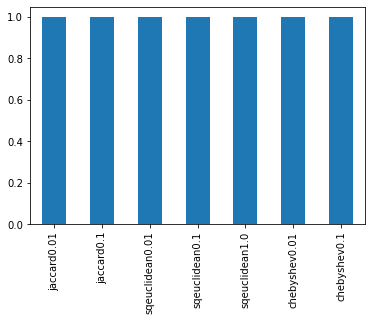

Number of dimensions detected: 875

CENTROID 1 || sk: 7936.287850324026	fk: 1.0	a: None
CENTROID 2 || sk: 7860.202892514514	fk: 0.9912626831895198	a: 0.9991428571428571
CENTROID 3 || sk: 7813.483889355345	fk: 0.9947668076155533	a: 0.9992857142857142
CENTROID 4 || sk: 7772.356749995745	fk: 0.9953288466965949	a: 0.9994047619047619
CENTROID 5 || sk: 7731.6969528864	fk: 0.9952623473361174	a: 0.9995039682539683
CENTROID 6 || sk: 7691.77200511667	fk: 0.9952475939063232	a: 0.9995866402116402
CENTROID 7 || sk: 7652.367181128228	fk: 0.9952198360042981	a: 0.9996555335097002
CENTROID 8 || sk: 7621.366477814596	fk: 0.9962348486453501	a: 0.9997129445914168
CENTROID 9 || sk: 7592.500333039954	fk: 0.9964508350681771	a: 0.999760787159514
CENTROID 10 || sk: 7568.059467815021	fk: 0.9969796620457936	a: 0.9998006559662617


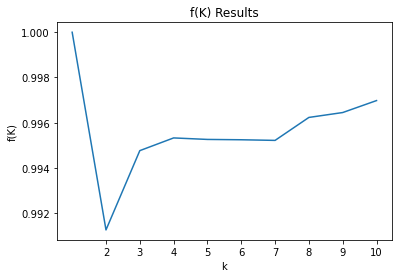


 ------ dbscan clustering done ------

{-1: 145, 0: 7968}

------row: dbscan, col: wiki------
col_0   0.0  1.0
row_0           
-1      138    7
 0     7353  615



------row: kmeans, col: wiki------
col_0   0.0  1.0
row_0           
0       894   43
1      6597  579



------row: dbscan, col: kmeans------
col_0    0     1
row_0           
-1       6   139
 0     931  7037



 N of website in each cluster (KMEANS)

1    7176
0     937
Name: 0, dtype: int64


In [10]:
#%% clustering
ml = MachineLearning(dfX=mdf2.dfX, dfy=mdf2.dfy)

if True:
    ml.find_dbscan(metrics=['jaccard','sqeuclidean', 'chebyshev'], eps=[0.01,0.1,1,10], min_samples=4)

if True:
    ml.find_kmeans(max_k = 10)


ml.do_kmeans(nK=2)

ml.do_dbscan(eps=0.5, min_samples=5, metric='chebyshev')
unique, counts = np.unique(ml.dfy_db, return_counts=True)
print(dict(zip(unique, counts)))

print('\n------row: dbscan, col: wiki------')
print(pd.crosstab(ml.dfy_db, mdf2.df_merged.loc[ mdf2.df_merged['language']=='fr', ['wiki']].values.ravel()))
print('\n')

print('\n------row: kmeans, col: wiki------')
print(pd.crosstab(ml.dfy_kmeans, mdf2.df_merged.loc[ mdf2.df_merged['language']=='fr', ['wiki']].values.ravel()))
print('\n')

print('\n------row: dbscan, col: kmeans------')
print(pd.crosstab(ml.dfy_db, ml.dfy_kmeans))
print('\n')

cluster_kmeans=pd.DataFrame(ml.dfy_kmeans)
cluster_dbscan=pd.DataFrame(ml.dfy_db)

print('\n N of website in each cluster (KMEANS)\n')
print(cluster_kmeans[0].value_counts())

In [11]:
# just for reload clustering

# ml = MachineLearning(dfX=mdf2.dfX, dfy=mdf2.dfy)
# ml.do_kmeans(nK=2)
# cluster_kmeans=pd.DataFrame(ml.dfy_kmeans)

#### Bilan:
- dbscan ne fonctionne pas, quelle que soit la métrique utilisée
- léger avantage pour k=2 avec le kmeans
- pas de lien a priori entre la variable wiki et les 2 clusters identifiés par Kmeans


# Machine learning & Clustering

###  Logistic Regression

In [12]:
#%% ML with kmeans clusters 
ml = MachineLearning(dfX=mdf2.dfX, dfy=cluster_kmeans)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

ml.instantiate_classif(classifier='lr',
                       max_depth=4,
                       class_weight=None,
                       n_estimators=500,
                       penalty=None,
                       C=None,
                       solver=None
                       )
ml.fit_classif()

print('\npca done? ', ml.pca)


data were splitted with parameters: 
 -test_size: 0.5

 Classifier is logistic regression 

 hyperparameters are: 
 -C: 1
 -penalty: none
 -solver: lbfgs

 Score is 0.996
Confusion matrix is 
 [[ 480   10]
 [   7 3560]]

pca done?  False


#### Bilan:
- bon score du classifier sur le testing set sur les clusters identifiés par kmeans

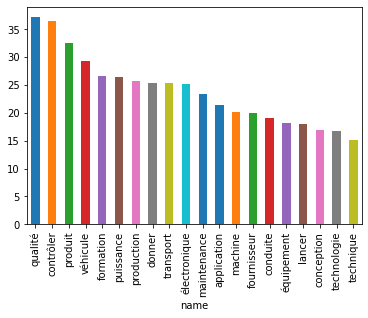

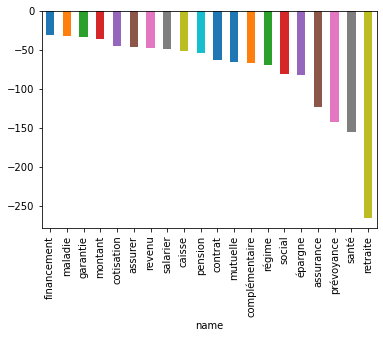

In [13]:
#%%
coef_lr=pd.DataFrame.from_dict({'name':mdf2.dfX.columns,'coef':(ml.classif.coef_[0].ravel())})

# print(coef_lr.sort_values('coef', ascending = False)[0:20])
# print(coef_lr.sort_values('coef', ascending = False)[-20::])

coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].plot.bar()
plt.show()
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].plot.bar()
plt.show()

#### Bilan




### Random Forest

In [14]:
#%% ML with kmeans clusters 

ml = MachineLearning(dfX=mdf2.dfX, dfy=cluster_kmeans)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

ml.instantiate_classif(classifier='rf',
                       max_depth=4,
                       class_weight=None,
                       n_estimators=1000,
                       penalty=None,
                       C=None,
                       solver=None
                       )
ml.fit_classif()

print('\npca done? ', ml.pca)


data were splitted with parameters: 
 -test_size: 0.5

 Classifier is random forest 

 hyperparameters are: 
 -n_estimators: 1000
 -max_depth: 4
 -class_weight: balanced_subsample

 Score is 0.979
Confusion matrix is 
 [[ 431   59]
 [  26 3541]]

pca done?  False


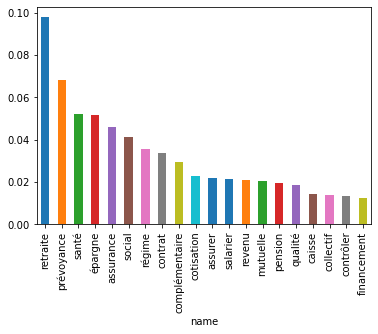

In [15]:
coef_rf=pd.DataFrame.from_dict({'name':mdf2.dfX.columns,'coef':(ml.classif.feature_importances_.ravel())})

# print(coef_rf.sort_values('coef', ascending = False)[0:20])

coef_rf.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].plot.bar()
plt.show()

# Analyses complémentaires

In [16]:
ax_X=mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=1)
ax_Y=mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].index.tolist()].mean(axis=1)

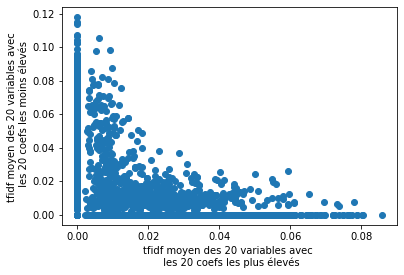

In [17]:
plt.scatter(ax_X,ax_Y)
plt.xlabel('tfidf moyen des 20 variables avec \n les 20 coefs les plus élevés')
plt.ylabel('tfidf moyen des 20 variables avec \n les 20 coefs les moins élevés')
plt.show()

In [18]:
mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=0)

qualité         0.023155
contrôler       0.020881
produit         0.022660
véhicule        0.021644
formation       0.011163
puissance       0.015445
production      0.013577
donner          0.014704
transport       0.011395
électronique    0.014400
maintenance     0.013208
application     0.008680
machine         0.011313
fournisseur     0.009852
conduite        0.010653
équipement      0.010989
lancer          0.011537
conception      0.009730
technologie     0.008039
technique       0.008903
dtype: float64

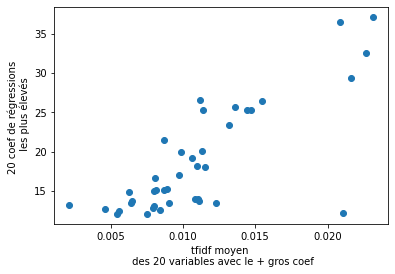

In [19]:
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:40].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:40])
plt.xlabel('tfidf moyen \n des 20 variables avec le + gros coef')
plt.ylabel('20 coef de régressions \n les plus élevés')
plt.show()

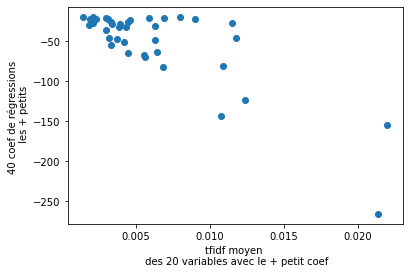

In [20]:
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-40::].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-40::])
plt.xlabel('tfidf moyen \n des 20 variables avec le + petit coef')
plt.ylabel('40 coef de régressions \n les + petits')
plt.show()

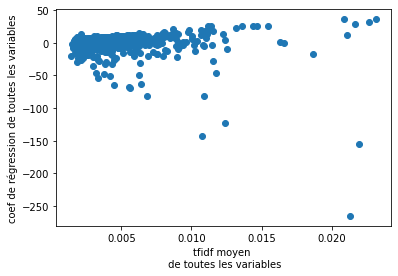

In [21]:
plt.scatter(mdf2.dfX.mean(axis=0),coef_lr.coef)
plt.ylabel('coef de régression de toutes les variables')
plt.xlabel('tfidf moyen \n de toutes les variables')
plt.show()

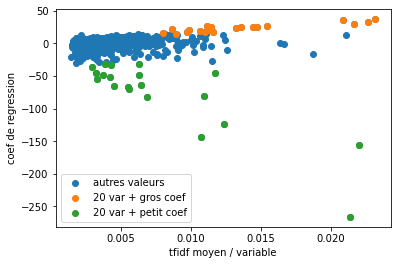

In [22]:
plt.scatter(mdf2.dfX.mean(axis=0),coef_lr.coef, label='autres valeurs')
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20], label='20 var + gros coef')
plt.scatter(mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].index.tolist()].mean(axis=0),
coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::], label='20 var + petit coef')
plt.legend()
plt.ylabel('coef de regression')
plt.xlabel('tfidf moyen / variable')
plt.show()

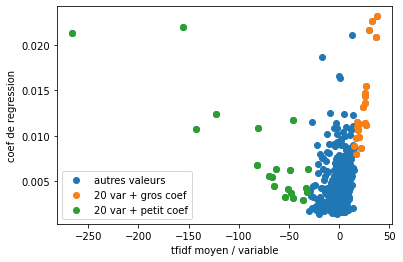

In [23]:
plt.scatter(coef_lr.coef,mdf2.dfX.mean(axis=0), label='autres valeurs')
plt.scatter(coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20], 
            mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][0:20].index.tolist()].mean(axis=0),
            label='20 var + gros coef')
plt.scatter(coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::],
            mdf2.dfX[coef_lr.sort_values('coef', ascending = False).set_index('name')['coef'][-20::].index.tolist()].mean(axis=0),
            label='20 var + petit coef')
plt.legend()
plt.ylabel('coef de regression')
plt.xlabel('tfidf moyen / variable')
plt.show()

In [24]:
mot_cluster = pd.concat([pd.Series(mdf2.df_merged[mdf2.df_merged['language']=='fr'].url).reset_index(drop=True), cluster_kmeans.reset_index(drop=True)],axis=1, ignore_index=True)
mot_cluster.columns = ['mot','cluster']

In [25]:
mot_cluster.head()

,mot,cluster
0,www.ratp.fr,1
1,www.ratp.fr,1
2,www.ratp.fr,1
3,www.ratp.fr,1
4,www.ratp.fr,1


In [26]:
mot_cluster.shape

(8113, 2)

In [27]:
mot_cluster.groupby(['cluster','mot'])['mot'].count()

cluster  mot                                      
0        52.force-ouvriere.org                        1
         53.force-ouvriere.org                        1
         a06.apps.paris.fr                            1
         acpr.banque-france.fr                        1
         actu.orange.fr                               1
         adh.francemutuelle.fr                        1
         agence.april.fr                              1
         agora.presenca.fr                            1
         agriculture.gouv.fr                          1
         aide-a-domicile.ooreka.fr                    1
         aimonsles.files.wordpress.com                1
         anticipa.cnp.fr                              1
         apgis.com                                    1
         article-83.aspicio.fr                        1
         assurance-maladie.ameli.fr                   2
         assurance.carrefour.fr                       1
         assurepros-assurances.fr                    

In [28]:
mot_cluster.sort_values('cluster').drop_duplicates('mot')

,mot,cluster
2067,solidarites-sante.gouv.fr,0
7135,www.probtp.com,0
1021,theconversation.com,0
7136,www.questions-investisseur.com,0
7138,www.raiffeisen.ch,0
7139,www.recrut.com,0
7140,www.regardbtp.com,0
7141,www.reglementation-assurance.com,0
7142,www.retraite.com,0
7145,www.rhetores.fr,0


In [29]:
[mot for mot,clus in zip(mot_cluster.drop_duplicates('mot').mot, mot_cluster.drop_duplicates('mot').cluster) if clus == 0]

['www.mutuelledesmotards.fr',
 'www.boursorama-banque.com',
 'www.resilier.com',
 'www.aon.com',
 'www.ash.tm.fr',
 'www.s2hgroup.com',
 'www.urssaf.fr',
 'www.groupe-uneo.fr',
 'www.lamutuellegenerale.fr',
 'www.allianz.fr',
 'www.credit-suisse.com',
 'sante.cgt.fr',
 'entreprises.carsat-aquitaine.fr',
 'www.cnesst.gouv.qc.ca',
 'www.sante-securite-interim.fr',
 'assurance-maladie.ameli.fr',
 'commerce.gov.dz',
 'droit-medical.com',
 'reflexeformeetsante.com',
 'www.ars.sante.fr',
 'www.bourgogne-franche-comte.ars.sante.fr',
 'www.brunet.ca',
 'www.centre-val-de-loire.ars.sante.fr',
 'www.conseil-national.medecin.fr',
 'www.contrepoints.org',
 'www.covid19-pressepro.fr',
 'www.droit-spav.fr',
 'www.gan.fr',
 'www.hcsp.fr',
 'www.health.gov.on.ca',
 'www.igas.gouv.fr',
 'www.maaf.fr',
 'www.medisite.fr',
 'www.ps-ecublens.ch',
 'www.qms-iedm.fr',
 'www.smatis.fr',
 'www.topsante.com',
 'www.touteleurope.eu',
 'www.vinsduroussillon.com',
 'www.zvei.org',
 'codes34.org',
 'cpih.ch',
 'mo

In [30]:
[mot for mot,clus in zip(mot_cluster.drop_duplicates('mot').mot, mot_cluster.drop_duplicates('mot').cluster) if clus == 1]

['www.ratp.fr',
 'www.remorquerolland.com',
 'www.renault.fr',
 'www.safran-group.com',
 'www.scoop.developpement-durable.gouv.fr',
 'www.scopex.fr',
 'www.se.com',
 'www.seat.fr',
 'www.senat.fr',
 'www.senseofwellness-mag.com',
 'www.service-public.fr',
 'www.setam.com',
 'www.sieeen.orios-infos.com',
 'www.skoda.fr',
 'www.smart.com',
 'www.societegenerale.com',
 'www.sojadis.com',
 'www.steyr-traktoren.com',
 'www.stone-wash.fr',
 'www.sydec40.fr',
 'www.tam-surplus.fr',
 'www.tcp-quad.com',
 'www.techno-science.net',
 'www.telip.fr',
 'www.tesla.com',
 'www.thebusinessplanshop.com',
 'www.thema-radiologie.fr',
 'www.tilt-equipement.com',
 'www.toro-distribution.com',
 'www.toro.com',
 'www.total.fr',
 'www.toyota.fr',
 'www.trakto.ca',
 'www.transportissimo.com',
 'www.tresor.economie.gouv.fr',
 'www.truck.man.eu',
 'www.truckchocdiscount.com',
 'www.ugap.fr',
 'www.gov.mb.ca',
 'www.universfreebox.com',
 'www.unoosa.org',
 'www.us-militaria.com',
 'www.usine-digitale.fr',
 'www.u

Cluster 1: beaucoup d'assurances là dedans

# Classif & Clustering avec le data frame transposé

**Objectif**: regrouper les mots associés

**Bilan:** 

In [31]:
col_name=mdf2.df_merged[mdf2.df_merged['language']=='fr'].url

In [32]:
#%% clustering
ml = MachineLearning(dfX=mdf2.dfX.T, dfy=pd.DataFrame({'fake':range(0,mdf2.dfX.shape[1])}))
ml.do_pca(n_components=2)


dataset was NOT splitted, applying pca on dfX


In [33]:
ml.dfX

array([[-0.11642166, -0.13550285],
       [-0.17198927,  0.01997398],
       [ 0.32783331, -0.14896992],
       ...,
       [-0.10913461, -0.13186517],
       [-0.06053793, -0.02831927],
       [ 0.01304735,  0.07387407]])


-----------------------------------------------
metrics tested will be: 
 ['braycurtis', 'canberra', 'chebyshev', 'dice', 'euclidean', 'jaccard', 'rogerstanimoto', 'russellrao', 'sokalmichener', 'sokalsneath', 'sqeuclidean']
-----------------------------------------------
eps tested will be: 
 [0.05, 0.5, 5]
-----------------------------------------------

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: braycurtis and 
 -eps: 5

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: canberra and 
 -eps: 5

 ------ dbscan clustering done ------


 ------ dbscan clustering done ------


 ------ dbscan clustering done ------

Clustering Error with 
 -metric: chebyshev and 
 -eps: 5

 ------ dbscan clustering done ------

Clustering Error with 
 -metric: dice and 
 -eps: 0.05

 ------ dbscan

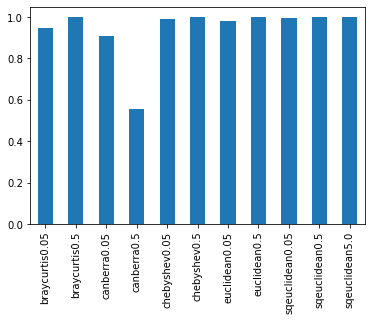

Number of dimensions detected: 2

CENTROID 1 || sk: 190.8132061164417	fk: 1.0	a: None
CENTROID 2 || sk: 134.64038534077525	fk: 1.128981693299466	a: 0.625
CENTROID 3 || sk: 86.25767161628296	fk: 0.9318578809142944	a: 0.6875
CENTROID 4 || sk: 64.13394808058226	fk: 1.0053172377646786	a: 0.7395833333333334
CENTROID 5 || sk: 47.42484795529592	fk: 0.9444172541596255	a: 0.7829861111111112
CENTROID 6 || sk: 39.827058348197355	fk: 1.0251942166356447	a: 0.8191550925925927
CENTROID 7 || sk: 32.49101974197902	fk: 0.9605634972632827	a: 0.8492959104938272
CENTROID 8 || sk: 27.48441236639134	fk: 0.9674006607192612	a: 0.8744132587448561
CENTROID 9 || sk: 24.171589973262357	fk: 0.98226495499867	a: 0.8953443822873801
CENTROID 10 || sk: 21.610794880576734	fk: 0.9794811522129597	a: 0.9127869852394834
CENTROID 11 || sk: 19.270962163517087	fk: 0.9616164097748219	a: 0.9273224876995695
CENTROID 12 || sk: 17.251410781633453	fk: 0.952915285611513	a: 0.939435406416308
CENTROID 13 || sk: 15.44182445195734	fk: 0.9

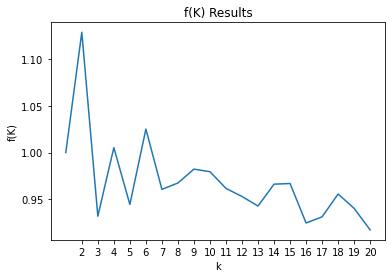

In [34]:
if True:
    ml.find_dbscan(metrics=None, eps=[0.05, 0.5, 5], min_samples=5)

if True:
    ml.find_kmeans(max_k = 20)



In [49]:
ml.do_kmeans(nK=3)

# ml.do_dbscan(eps=0.5, min_samples=5, metric='chebyshev')
# unique, counts = np.unique(ml.dfy_db, return_counts=True)
# print(dict(zip(unique, counts)))


# print('\n------row: dbscan, col: kmeans------')
# print(pd.crosstab(ml.dfy_db, ml.dfy_kmeans))
# print('\n')

cluster_kmeans=pd.DataFrame(ml.dfy_kmeans)
# cluster_dbscan=pd.DataFrame(ml.dfy_db)

In [50]:
pd.Series(cluster_kmeans[0]).value_counts()

0    835
1     34
2      6
Name: 0, dtype: int64

In [51]:
#%% ML with kmeans clusters 
ml = MachineLearning(dfX=mdf2.dfX.T, dfy=cluster_kmeans)
ml.do_pca(n_components=2)

ml.split_data(random_state=99, 
              test_size=0.5, 
              stratify=None)

ml.instantiate_classif(classifier='lr',
                       max_depth=4,
                       class_weight=None,
                       n_estimators=500,
                       penalty=None,
                       C=None,
                       solver=None
                       )
ml.fit_classif()

print('\npca done? ', ml.pca)


dataset was NOT splitted, applying pca on dfX

data were splitted with parameters: 
 -test_size: 0.5

 Classifier is logistic regression 

 hyperparameters are: 
 -C: 1
 -penalty: none
 -solver: lbfgs

 Score is 1.000
Confusion matrix is 
 [[420   0   0]
 [  0  16   0]
 [  0   0   2]]

pca done?  True


In [52]:
pd.DataFrame(ml.dfX).head()

,0,1
0,-0.116399,-0.135768
1,-0.171768,0.019927
2,0.327892,-0.148844
3,0.163797,0.058729
4,-0.007190,-0.195355


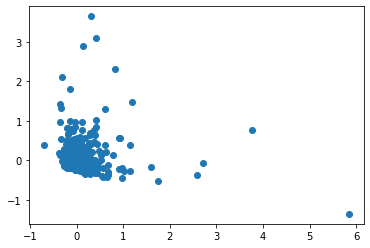

In [53]:
plt.scatter(pd.DataFrame(ml.dfX)[0],pd.DataFrame(ml.dfX)[1])

In [54]:
mot_cluster = pd.concat([pd.Series(mdf2.dfX.T.index), cluster_kmeans],axis=1, ignore_index=True)
mot_cluster.columns = ['mot','cluster']

In [55]:
mot_cluster.shape

(875, 2)

In [56]:
mot_cluster.groupby(['cluster','mot'])['mot'].count()

cluster  mot           
0        accepter          1
         accessoire        1
         accident          1
         accompagner       1
         accord            1
         accueil           1
         accès             1
         accéder           1
         achat             1
         acheter           1
         acquisition       1
         acteur            1
         actif             1
         action            1
         activité          1
         actualité         1
         actuel            1
         actuellement      1
         adapter           1
         adapté            1
         administratif     1
         administration    1
         adopter           1
         adresse           1
         affairer          1
         afficher          1
         agence            1
         agent             1
         agir              1
         agricole          1
                          ..
1        gestion           1
         grand             1
         industriel

In [57]:
mot_cluster.sort_values('cluster').drop_duplicates('mot')

,mot,cluster
0,accepter,0
563,optimisation,0
564,optimiser,0
565,option,0
566,optique,0
567,opérateur,0
568,opération,0
569,opérationnel,0
570,ordinateur,0
571,ordre,0


In [58]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 0]

['accepter',
 'accessoire',
 'accident',
 'accompagner',
 'accord',
 'accueil',
 'accès',
 'accéder',
 'achat',
 'acheter',
 'acquisition',
 'acteur',
 'actif',
 'action',
 'activité',
 'actualité',
 'actuel',
 'actuellement',
 'adapter',
 'adapté',
 'administratif',
 'administration',
 'adopter',
 'adresse',
 'affairer',
 'afficher',
 'agence',
 'agent',
 'agir',
 'agricole',
 'aide',
 'aider',
 'air',
 'ajouter',
 'alerte',
 'alimentaire',
 'alimentation',
 'aller',
 'amélioration',
 'améliorer',
 'aménagement',
 'an',
 'analyse',
 'analyser',
 'and',
 'annoncer',
 'annuel',
 'année',
 'anticiper',
 'appareil',
 'appel',
 'appeler',
 'application',
 'appliquer',
 'apporter',
 'apprendre',
 'apprentissage',
 'approche',
 'appuyer',
 'arme',
 'armement',
 'arrêt',
 'article',
 'artificiel',
 'assistance',
 'association',
 'associer',
 'atelier',
 'attaquer',
 'atteindre',
 'attendre',
 'attente',
 'attention',
 'audit',
 'augmentation',
 'augmenter',
 'auprès',
 'autant',
 'auto',
 'au

In [59]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 1]

['assurer',
 'carte',
 'client',
 'conception',
 'contrôler',
 'donner',
 'entreprise',
 'faire',
 'formation',
 'fournisseur',
 'gestion',
 'grand',
 'industriel',
 'lancement',
 'machine',
 'maintenance',
 'offre',
 'permettre',
 'production',
 'produit',
 'professionnel',
 'projet',
 'proposer',
 'qualité',
 'savoir',
 'service',
 'site',
 'solution',
 'technique',
 'transport',
 'travail',
 'véhicule',
 'électronique',
 'équipement']

In [60]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 2]

['assurance', 'prévoyance', 'retraite', 'santé', 'social', 'épargne']

In [61]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 3]

[]

In [62]:
[mot for mot,clus in zip(mot_cluster.mot, mot_cluster.cluster)if clus == 4]

[]